In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from .load_data import get_connection_string

In [ ]:
def read_view_to_dataframe(view_name):
    """
    Uses pandas to read all data from given view in the database

    Parameters:
    view_name(string): Name of view you would like to query, 

    Returns:
    Pandas Dataframe
    """
    try:
        engine = create_engine(get_connection_string())
        # Define the SQL query to read from the view
        sql_query = f"SELECT * FROM {view_name};"
        
        # Read the SQL view into a DataFrame
        df = pd.read_sql(sql_query, engine)
        
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Dispose of the engine to close the connection
        engine.dispose()

In [ ]:
## read vw_onet_closest_oews and display the results
dataframe = read_view_to_dataframe("vw_onet_closest_oews")
display(dataframe)

In [4]:
# Sample data for the vw_onet_closest_oews view
data = {
    'ONETSOC_Code': ['29-1141.01', '29-1141.02', '29-1141.03', '25-2346.99', '13-6729.05'],
    'Element_Name': ['Nurse Anesthetists', 'Nurse Practitioners', 'Nurse Midwives', 'Construction Manager', 'Software Engineer'],
    'avg_a_mean': [100000, 95000, 90000, 120000, 45000],  # Average annual wage
    'total_employment': [5000, 3000, 2000, 8000, 3000],  # Total employment
    'OCC_CODE': ['29-1141', '29-1141', '29-1141', '25-2346', '13-6729' ]  # 6-digit OEWS occupation code
}

# Create the DataFrame
vw_onet_closest_oews_df = pd.DataFrame(data)
display(vw_onet_closest_oews_df)

,ONETSOC_Code,Element_Name,avg_a_mean,total_employment,OCC_CODE
0,29-1141.01,Nurse Anesthetists,100000,5000,29-1141
1,29-1141.02,Nurse Practitioners,95000,3000,29-1141
2,29-1141.03,Nurse Midwives,90000,2000,29-1141
3,25-2346.99,Construction Manager,120000,8000,25-2346
4,13-6729.05,Software Engineer,45000,3000,13-6729


In [ ]:
## Plot a histogram for the statistical analysis of each metric column
def get_summery_for_column(option):
    if option == 'Average Wage':
        summary_stats = vw_onet_closest_oews_df['avg_a_mean'].describe()
        labels = {"Title": "Average Wage Statistic Data",
                  "X": "Average Wage",
                  "Y": "Wage ($)"}
    else:  
        summary_stats = vw_onet_closest_oews_df['total_employment'].describe()
        labels = {"Title": "Employment Statistic Data",
                  "X": "Total Employment",
                  "Y": "Number of Jobs"}
    # convert returned list to df
    summary_df = pd.DataFrame(summary_stats)
    # Create a bar plot for the mean, std, min, and max
    plt.figure(figsize=(8, 6))
    summary_df.boxplot()
    plt.title(labels["Title"])
    plt.ylabel(labels["Y"])
    plt.xlabel(labels["X"])
    

toggle = widgets.Dropdown(
    options=['Average Wage', 'Total Employement'],
    value='Average Wage',
    description='Select:',
)

widgets.interactive(get_summery_for_column, option=toggle)

interactive(children=(Dropdown(description='Select:', options=('Average Wage', 'Total Employement'), value='Av…

,Major_Group,avg_a_mean
0,13,45000.0
1,25,120000.0
2,29,95000.0


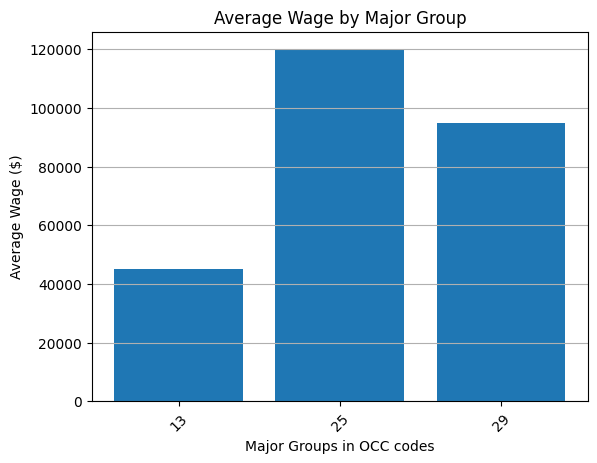

In [ ]:
## average wage by major group

# define major group by creating col with first 2 didgets of occ_code
vw_onet_closest_oews_df['Major_Group'] = vw_onet_closest_oews_df['OCC_CODE'].str[:2]
# group by major group and calculate new mean
average_wage_by_major_group = vw_onet_closest_oews_df.groupby('Major_Group')['avg_a_mean'].mean().reset_index()
# handle output
display(average_wage_by_major_group)
plt.bar(
    average_wage_by_major_group['Major_Group'],
    average_wage_by_major_group['avg_a_mean'])
plt.title('Average Wage by Major Group')
plt.xlabel('Major Groups in OCC codes')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [8]:
## top or bottom 3 SOC codes by predicted wage

#handle user input and select ranking
def get_top_or_bottom(option):
    if option == 'Top 3':
        result = vw_onet_closest_oews_df.nlargest(3, 'avg_a_mean')
    else:
        result = vw_onet_closest_oews_df.nsmallest(3, 'avg_a_mean')
    
    ranked_codes=result[["avg_a_mean", "Element_Name", "ONETSOC_Code"]]
    ## handle output
    display(ranked_codes)
    plt.figure(figsize=(10, 6))
    plt.bar(ranked_codes['Element_Name'], ranked_codes['avg_a_mean'], color='magenta')
    plt.title('Top O*NET SOC Codes by Predicted Wage')
    plt.xlabel('O*NET SOC Code')
    plt.ylabel('Average Wage ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

toggle = widgets.Dropdown(
    options=['Top 3', 'Lowest 3'],
    value='Top 3',
    description='Select:',
)

widgets.interactive(get_top_or_bottom, option=toggle)


interactive(children=(Dropdown(description='Select:', options=('Top 3', 'Lowest 3'), value='Top 3'), Output())…

,total_employment,Element_Name,ONETSOC_Code
3,8000,Construction Manager,25-2346.99
0,5000,Nurse Anesthetists,29-1141.01
1,3000,Nurse Practitioners,29-1141.02


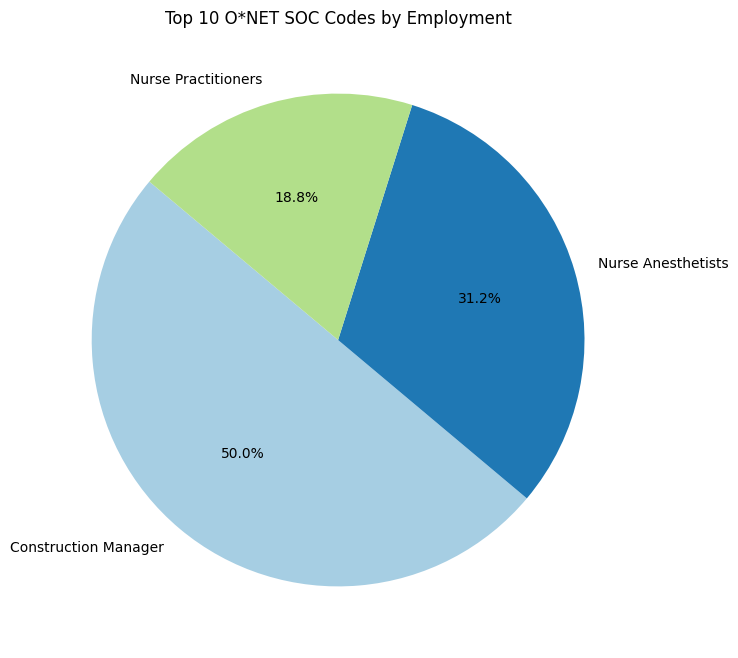

In [21]:
# find the top 3 most populated jobs
top_3_most_jobs = vw_onet_closest_oews_df.nlargest(3, "total_employment")[["total_employment", "Element_Name", "ONETSOC_Code"]]

# handle output
plt.figure(figsize=(10, 8))
plt.pie(top_3_most_jobs['total_employment'], 
        labels=top_3_most_jobs['Element_Name'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title('Top 10 O*NET SOC Codes by Employment')
display(top_3_most_jobs)

